# ECG-Derived Respiration (EDR)

This example can be referenced by [citing the package](https://neuropsychology.github.io/NeuroKit/cite_us.html).

ECG-derived respiration (EDR) is the extraction of respiratory information from ECG and is a noninvasive method to monitor respiration activity under instances when respiratory signals are not recorded. In clinical settings, this presents convenience as it allows the monitoring of cardiac and respiratory signals simultaneously from a recorded ECG signal. This example shows how to use NeuroKit to perform EDR analysis.

In [1]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd

In [ ]:
# Note: this cell is hidden using the "remove-input" tag
# Make bigger images
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]  
plt.rcParams['font.size']= 14

## Download ECG Data

In this example, we will download a dataset containing an ECG signal sampled at 1000 Hz.

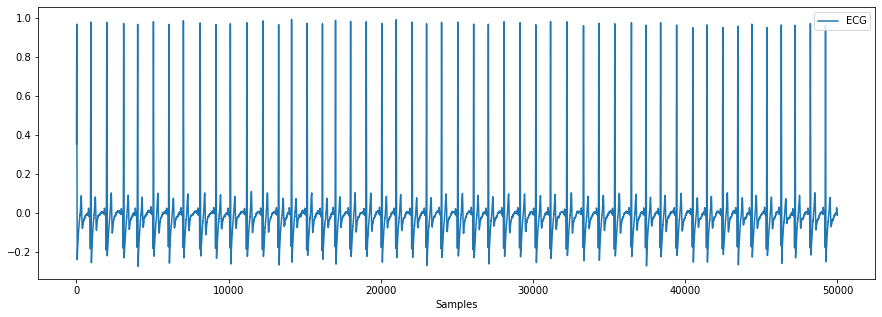

In [4]:
# Get data
ecg = nk.data('ecg_1000hz.csv')

# Visualize signal
nk.signal_plot(ecg) 

## Extraction of ECG Features

Now you can extract the R peaks of the signal using `ecg_peaks()` and compute the heart period using `ecg_rate()`. 

*Note: As the dataset has a frequency of 1000Hz, make sure the `sampling_rate` is also set to 1000Hz. It is critical that you specify the correct sampling rate of your signal throughout all the processing functions.*

In [5]:
# Extract peaks
rpeaks, info = nk.ecg_peaks(ecg, sampling_rate=1000)

# Compute rate
ecg_rate = nk.ecg_rate(rpeaks, sampling_rate=1000, desired_length=len(ecg))

## Analyse EDR

Now that we have an array of the heart period, we can then input this into `ecg_rsp()` to extract the EDR.

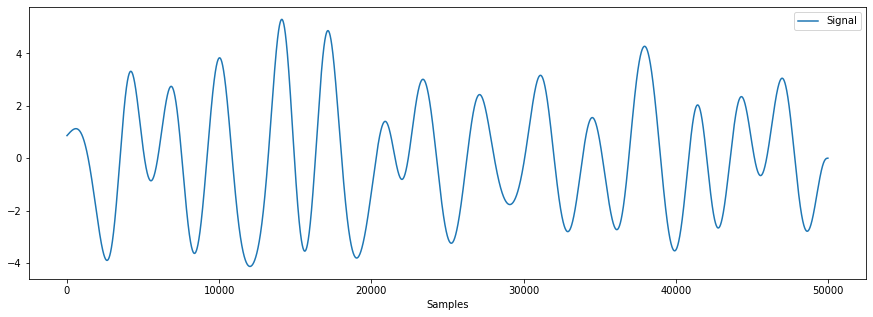

In [6]:
edr = nk.ecg_rsp(ecg_rate, sampling_rate=1000)

# Visual comparison
nk.signal_plot(edr)

The default method used is the one by **Van Gent et al. (2019)**, but the function `ecg_rsp()` incorporates different methods to compute EDR. For a visual comparison of the different methods, we can create a dataframe of EDR columns each of which are produced by different methods, and then plot it, like so:

In [7]:
edr_df = pd.DataFrame({
    "Van Gent et al.": nk.ecg_rsp(ecg_rate, sampling_rate=1000),
    "Charlton et al." : nk.ecg_rsp(ecg_rate, sampling_rate=1000, method="charlton2016"),
    "Soni et al.": nk.ecg_rsp(ecg_rate, sampling_rate=1000, method="soni2019"),
    "Sarkar et al.": nk.ecg_rsp(ecg_rate, sampling_rate=1000, method="sarkar2015")
    })

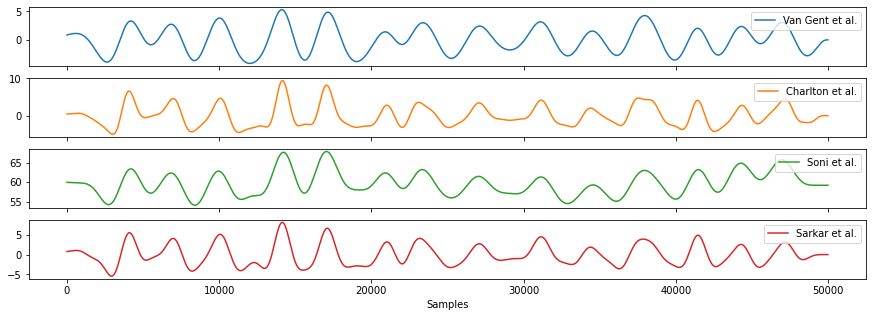

In [8]:
nk.signal_plot(edr_df, subplots=True)